# NLP Project
## Sentiment Analysis 

In [81]:
import pandas as pd
import numpy as np

In [82]:
df_train = pd.read_csv('../dataset/final_label/train.csv')
df_test = pd.read_csv('../dataset/final_label/test.csv')
df_val = pd.read_csv('../dataset/final_label/val.csv')

In [83]:
dataframes = [df_train, df_val, df_test]
df_concat = pd.concat(dataframes)
len(df_concat)

4509

In [84]:
# def replaceStarBy0or1(data):
#     data['y'] = data['y'].replace([[1,2],[3,4,5]],[0,1])
#     return data

In [85]:
# def replaceStarBy0or1(data):
#     data['y'] = data['y'].replace([[1,2,3],[4,5]],[0,1])
#     return data

In [86]:
# df_concat = replaceStarBy0or1(df_concat)

In [87]:
df_concat.y.value_counts()

2    2000
1    1621
0     888
Name: y, dtype: int64

In [88]:
X, y = df_concat['x'], df_concat['y']

In [89]:
X

0                          Four Stars. thought provoking
1      Not What I Expected. Although a few of the sto...
2      Outliers - Gladwell - A Good Tour of the Outer...
3      Surprisingly good..... .. Interesting connecti...
4                 Success. Good book to read for success
                             ...                        
537    Worth the money. page quality is good but its ...
538    Absolute Genius. This is the first book I read...
539    Excellent book. Outliers is an intriguing book...
540    Another article turned into a book. This is ye...
541                          Here is my animated review!
Name: x, Length: 4509, dtype: object

In [90]:
X.shape

(4509,)

In [91]:
y.shape

(4509,)

In [92]:
X_array_docs = X.values 

In [93]:
len(X_array_docs)

4509

In [94]:
X_array_docs

array(['Four Stars. thought provoking',
       'Not What I Expected. Although a few of the stories were interesting, I was lead to believe there were more interesting life stories told.',
       'Outliers - Gladwell - A Good Tour of the Outer End of Normality. I read the book as it is on a reading list for my job. It is an easy read and I caution you about the actual science behind it; we readers just swallow some things without checking. However, it is, like many of his books, a good tour of the subject and worthy of our time.',
       ...,
       'Excellent book. Outliers is an intriguing book of ten distinct stories of how more than just intelligence and hardwork helped people to become outliers in their professions. The book explores the backgrounds of athletes, software developers, and lawyers plus many more. It is a great read and a great gift for others.',
       'Another article turned into a book. This is yet another article turned into a 300 page book. Only the first two chap

In [95]:
y

0      1
1      0
2      1
3      1
4      2
      ..
537    1
538    2
539    2
540    0
541    1
Name: y, Length: 4509, dtype: int64

### Vocabulário: Todas as palavras que ocorrem no texto, sem repetições

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
# vectorizer = CountVectorizer(max_features=50)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(X_array_docs)

In [98]:
len(vectorizer.get_feature_names())

8358

### Retorna o vocabulário

In [99]:
vectorizer.get_feature_names()

['000',
 '00am',
 '10',
 '100',
 '1000',
 '10000',
 '10000hrs',
 '101',
 '102',
 '10k',
 '10th',
 '110',
 '118',
 '119',
 '11th',
 '12',
 '120',
 '12s',
 '12th',
 '13',
 '130',
 '1301',
 '14',
 '15',
 '150',
 '1518',
 '155',
 '16',
 '160',
 '165',
 '17',
 '17th',
 '180',
 '1800',
 '1800s',
 '1890',
 '19',
 '1930s',
 '1950',
 '1950s',
 '1952',
 '1953',
 '1955',
 '1957',
 '1960',
 '1963',
 '1995',
 '19th',
 '1st',
 '20',
 '200',
 '2005',
 '2008',
 '2009',
 '2011',
 '2012',
 '2014',
 '2016',
 '2018',
 '2020',
 '20th',
 '21st',
 '220',
 '23',
 '24',
 '245',
 '24hrs',
 '25',
 '26',
 '26th',
 '27',
 '270',
 '285',
 '28th',
 '2nd',
 '30',
 '300',
 '3000',
 '3012',
 '30am',
 '30s',
 '31',
 '34',
 '360',
 '3rd',
 '3rds',
 '40',
 '46',
 '49',
 '50',
 '5000',
 '50s',
 '55',
 '5stars',
 '5th',
 '60',
 '64',
 '6th',
 '70',
 '747',
 '7th',
 '80',
 '80s',
 '81',
 '8200',
 '8217',
 '8220',
 '8221',
 '8th',
 '90',
 '900',
 '96',
 '97',
 '99',
 '9th',
 '___',
 'a1',
 'a1920s',
 'abilities',
 'ability',


In [100]:
bag_of_words

<4509x8358 sparse matrix of type '<class 'numpy.int64'>'
	with 155249 stored elements in Compressed Sparse Row format>

In [101]:
bag_of_words.shape

(4509, 8358)

### the 10330 number that apeears in the shape method for the bag_of_words represents the number of features that are been used to represent each review in our corpus

In [102]:
matrix_sparse = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names())
matrix_sparse

,000,00am,10,100,1000,10000,10000hrs,101,102,10k,...,yrs,yuval,ywo,zeitgeist,zero,zerox,zivica,zone,zones,zooms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
train, test, class_train, class_test = train_test_split(bag_of_words, df_concat.y, random_state=42)

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(train, class_train)
accuracy = classifier.score(test, class_test)

In [107]:
accuracy

0.750886524822695

### Result with max_features = 50: 0.9283137962128043

In [108]:
def classify_text(corpus, review, sentiment):
    vectorizer = CountVectorizer()
    bag_of_words = vectorizer.fit_transform(corpus[review])
    train, test, class_train, class_test = train_test_split(bag_of_words, corpus[sentiment], random_state=42)
    classifier = RandomForestClassifier(n_estimators=200, random_state=0)
    classifier.fit(train, class_train)
    return classifier.score(test, class_test)

classify_text(df_concat, 'x', 'y')

0.750886524822695

In [109]:
%matplotlib inline

In [110]:
from wordcloud import WordCloud

In [111]:
X_array_docs[:3]

array(['Four Stars. thought provoking',
       'Not What I Expected. Although a few of the stories were interesting, I was lead to believe there were more interesting life stories told.',
       'Outliers - Gladwell - A Good Tour of the Outer End of Normality. I read the book as it is on a reading list for my job. It is an easy read and I caution you about the actual science behind it; we readers just swallow some things without checking. However, it is, like many of his books, a good tour of the subject and worthy of our time.'],
      dtype=object)

In [112]:
import matplotlib.pyplot as plt

### width and height paramteres define where the words are distributed in the figure

In [113]:

# def generate_wordcloud_sentiment_negative(text, target):
    
#     sentiment_text = text.query("y == 0")

#     all_words = ' '.join([text for text in sentiment_text[target]])

#     wordCloud = WordCloud(width=800, height=500,
#                             max_font_size=110).generate(all_words)

#     plt.figure(figsize=(10,7))
#     plt.imshow(wordCloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.show()

In [114]:
all_words = ' '.join([text for text in df_concat['x']])

In [ ]:
all_words

In [116]:

def generate_wordcloud_sentiment(text, target, sentiment):
    
    sentiment_text = text.query("y == " f'{sentiment}')

    all_words = ' '.join([text for text in sentiment_text[target]])

    wordCloud = WordCloud(width=800, height=500,
                            max_font_size=110).generate(all_words)

    plt.figure(figsize=(10,7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [117]:
df_concat.head(5)

,x,y
0,Four Stars. thought provoking,1
1,Not What I Expected. Although a few of the sto...,0
2,Outliers - Gladwell - A Good Tour of the Outer...,1
3,Surprisingly good..... .. Interesting connecti...,1
4,Success. Good book to read for success,2


In [118]:
df_concat.y

0      1
1      0
2      1
3      1
4      2
      ..
537    1
538    2
539    2
540    0
541    1
Name: y, Length: 4509, dtype: int64

In [119]:
df_concat_initial = df_concat.to_csv('../dataset/graphs/df_concat_initial.csv')

### Generating wordcloud with the sengative reviews

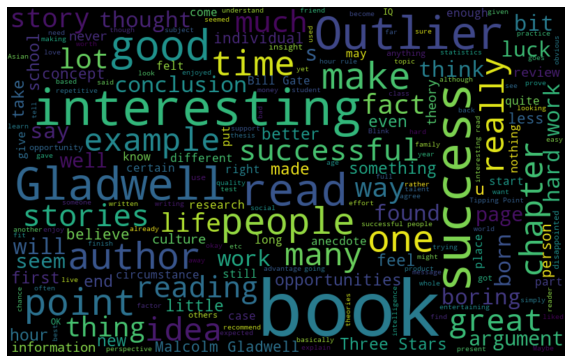

In [120]:
generate_wordcloud_sentiment(df_concat, 'x', 0)

### Generating wordcloud with the positive reviews

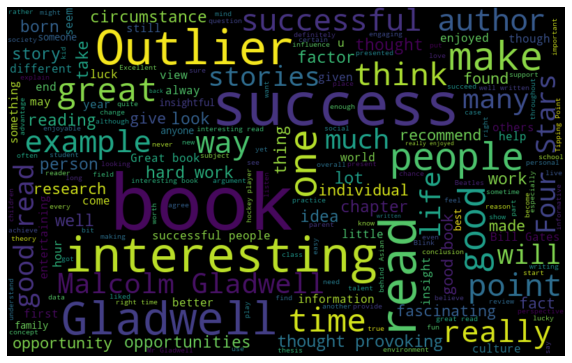

In [121]:
generate_wordcloud_sentiment(df_concat, 'x', 1)

In [122]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\cof2\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\cof2\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\cof2\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\cof2\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\cof2\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

True

In [123]:
# FreqDist should receive a list containing each word from our corpus (our tokens)
# frequence = nltk.FreqDist(X_array_docs)

### Creating a dataframe with the frequences where a column will be the words

In [124]:
# punctuation

In [125]:
# punctuation_list

In [126]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
tokens_corpus = token_space.tokenize(all_words)
frequence = nltk.FreqDist(tokens_corpus)


In [127]:
df_frequence = pd.DataFrame({"Word": list(frequence.keys()),
                             "Frequence": list(frequence.values())})

In [128]:
tokens_corpus

['Four',
 'Stars.',
 'thought',
 'provoking',
 'Not',
 'What',
 'I',
 'Expected.',
 'Although',
 'a',
 'few',
 'of',
 'the',
 'stories',
 'were',
 'interesting,',
 'I',
 'was',
 'lead',
 'to',
 'believe',
 'there',
 'were',
 'more',
 'interesting',
 'life',
 'stories',
 'told.',
 'Outliers',
 '-',
 'Gladwell',
 '-',
 'A',
 'Good',
 'Tour',
 'of',
 'the',
 'Outer',
 'End',
 'of',
 'Normality.',
 'I',
 'read',
 'the',
 'book',
 'as',
 'it',
 'is',
 'on',
 'a',
 'reading',
 'list',
 'for',
 'my',
 'job.',
 'It',
 'is',
 'an',
 'easy',
 'read',
 'and',
 'I',
 'caution',
 'you',
 'about',
 'the',
 'actual',
 'science',
 'behind',
 'it;',
 'we',
 'readers',
 'just',
 'swallow',
 'some',
 'things',
 'without',
 'checking.',
 'However,',
 'it',
 'is,',
 'like',
 'many',
 'of',
 'his',
 'books,',
 'a',
 'good',
 'tour',
 'of',
 'the',
 'subject',
 'and',
 'worthy',
 'of',
 'our',
 'time.',
 'Surprisingly',
 'good.....',
 '..',
 'Interesting',
 'connections',
 'one',
 "wouldn't",
 'imagine',
 'a

In [129]:
frequence

FreqDist({'the': 7922, 'and': 6267, 'to': 5683, 'of': 5492, 'a': 5007, 'I': 4102, 'is': 3226, 'that': 2924, 'in': 2817, 'book': 2723, ...})

In [130]:
len(frequence)

16366

In [131]:
df_frequence_largest = df_frequence.nlargest(columns = "Frequence", n = 10)

### Dictionary size: 21743

In [132]:
import seaborn as sns

In [133]:
def plot_high_frequence_words(dataset, review_col, number_of_words):
          
    all_words = ' '.join([dataset for dataset in dataset[review_col]])
    # print(dataset['processing1'][:2])
    tokens_corpus = token_space.tokenize(all_words)
    frequence = nltk.FreqDist(tokens_corpus)
    df_frequence = pd.DataFrame({"Word": list(frequence.keys()),
                             "Frequence": list(frequence.values())})

    df_frequence_largest = df_frequence.nlargest(columns = "Frequence", n = number_of_words)

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequence_largest, x = "Word", y = "Frequence", color ='orange')
    ax.set(ylabel = "Counting")
    plt.show()

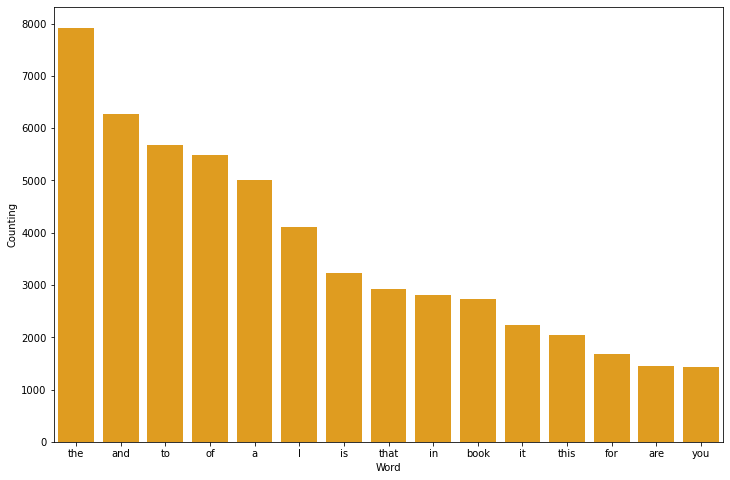

In [134]:
plot_high_frequence_words(df_concat, 'x', 15)

### Pre-processing data

In [135]:
irrelevant_words = nltk.corpus.stopwords.words("english")
irrelevant_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### removing stop words

In [136]:
processed_review = list()

for review in df_concat.x:
    new_review = list()
    text_review = token_space.tokenize(review)
    for word in text_review:
        if word not in irrelevant_words:
            new_review.append(word)

    processed_review.append(' '.join(new_review))

df_concat['processing1'] = processed_review

### processing1: Remove stop words in reviews

In [137]:
df_concat.head()

,x,y,processing1
0,Four Stars. thought provoking,1,Four Stars. thought provoking
1,Not What I Expected. Although a few of the sto...,0,Not What I Expected. Although stories interest...
2,Outliers - Gladwell - A Good Tour of the Outer...,1,Outliers - Gladwell - A Good Tour Outer End No...
3,Surprisingly good..... .. Interesting connecti...,1,Surprisingly good..... .. Interesting connecti...
4,Success. Good book to read for success,2,Success. Good book read success


### Accuracy withou any pre=processing: 0.9639314697926059

In [138]:
classify_text(df_concat,  'x', 'y')

0.750886524822695

### Accuracy after pre-processing 1 (removing stop words): 0.9643823264201984

In [139]:
classify_text(df_concat,  'processing1', 'y')

0.7367021276595744

In [140]:
print(df_concat[:1].x)

0    Four Stars. thought provoking
Name: x, dtype: object


In [141]:
print(df_concat[:1].processing1)

0    Four Stars. thought provoking
Name: processing1, dtype: object


### Wordcloud with negative reviews after pre-processing 1

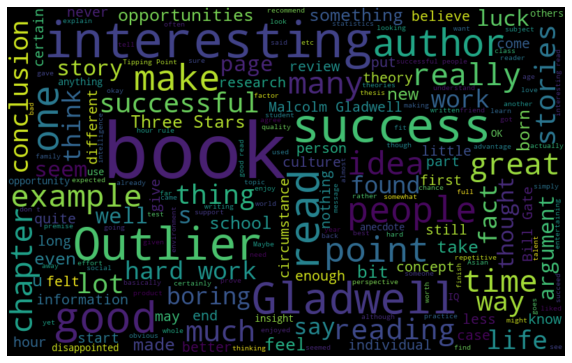

In [142]:
generate_wordcloud_sentiment(df_concat, 'processing1', 0)

### Wordcloud with positive reviews after pre-processing 1

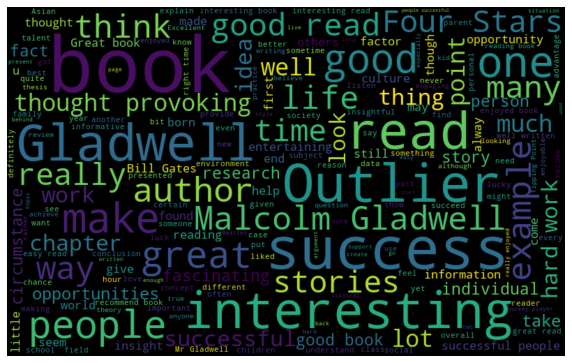

In [143]:
generate_wordcloud_sentiment(df_concat, 'processing1', 1)

### Plotting graph with high frequent words after pre processing 1

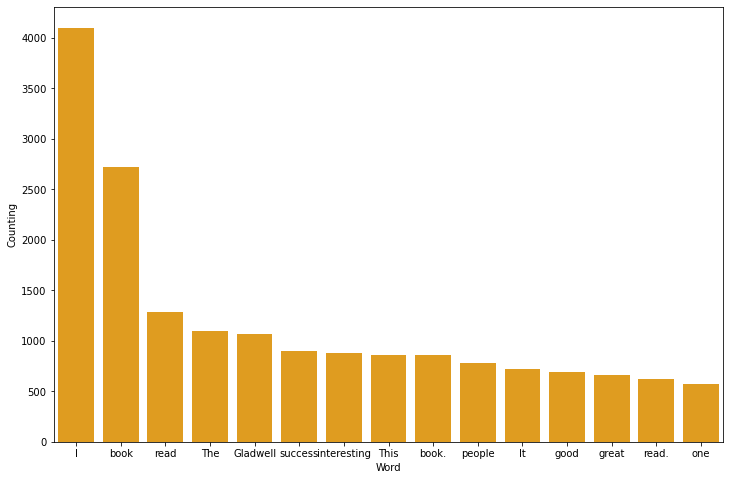

In [144]:
plot_high_frequence_words(df_concat, 'processing1', 15)

### Processing 2: Removing puncts

In [145]:
token_punctuation = tokenize.WordPunctTokenizer()

In [146]:
from string import punctuation

punctuation_ = list()
for ponto in punctuation:
    punctuation_.append(ponto)

punctuation__stopwords = punctuation_ + irrelevant_words

processed_review_remove_puncts = list()
for opiniao in df_concat['processing1']:
    new_review_without_puncts = list()
    words_text = token_punctuation.tokenize(opiniao)
    for word in words_text:
        if word not in punctuation__stopwords:
            new_review_without_puncts.append(word)
    processed_review_remove_puncts.append(' '.join(new_review_without_puncts))

df_concat['processing2'] = processed_review_remove_puncts


In [147]:
df_concat

,x,y,processing1,processing2
0,Four Stars. thought provoking,1,Four Stars. thought provoking,Four Stars thought provoking
1,Not What I Expected. Although a few of the sto...,0,Not What I Expected. Although stories interest...,Not What I Expected Although stories interesti...
2,Outliers - Gladwell - A Good Tour of the Outer...,1,Outliers - Gladwell - A Good Tour Outer End No...,Outliers Gladwell A Good Tour Outer End Normal...
3,Surprisingly good..... .. Interesting connecti...,1,Surprisingly good..... .. Interesting connecti...,Surprisingly good ..... .. Interesting connect...
4,Success. Good book to read for success,2,Success. Good book read success,Success Good book read success
...,...,...,...,...
537,Worth the money. page quality is good but its ...,1,Worth money. page quality good cover pages loo...,Worth money page quality good cover pages look...
538,Absolute Genius. This is the first book I read...,2,Absolute Genius. This first book I read Malcom...,Absolute Genius This first book I read Malcom ...
539,Excellent book. Outliers is an intriguing book...,2,Excellent book. Outliers intriguing book ten d...,Excellent book Outliers intriguing book ten di...
540,Another article turned into a book. This is ye...,0,Another article turned book. This yet another ...,Another article turned book This yet another a...


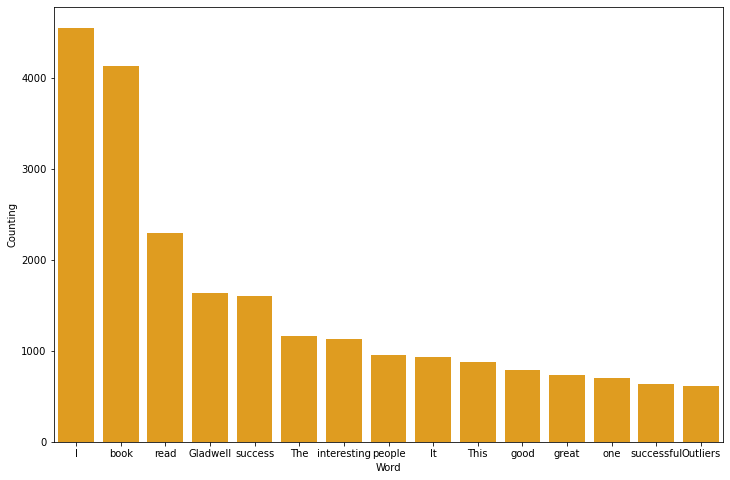

In [148]:
plot_high_frequence_words(df_concat, 'processing2', 15)

In [149]:
df_concat['processing1'][0]

0                        Four Stars. thought provoking
0    Enlighting!. Very interesting book. It makes l...
0    A great read worth every penny!. My first Malc...
Name: processing1, dtype: object

In [150]:
df_concat['processing2'][0]

0                         Four Stars thought provoking
0    Enlighting !. Very interesting book It makes l...
0    A great read worth every penny !. My first Mal...
Name: processing2, dtype: object

### Accuracy after removing puncts: 0.9639314697926059

In [151]:
classify_text(df_concat,  'processing2', 'y')

0.7384751773049646

### Processing 3: Transforming reviews to lower case

In [152]:
from string import punctuation

punctuation_ = list()
for ponto in punctuation:
    punctuation_.append(ponto)

punctuation__stopwords = punctuation_ + irrelevant_words

processed_review_remove_puncts = list()
for opiniao in df_concat['processing2']:
    new_review_without_puncts = list()
    opiniao = opiniao.lower()
    words_text = token_punctuation.tokenize(opiniao)
    for word in words_text:
        if word not in punctuation__stopwords:
            new_review_without_puncts.append(word)
    processed_review_remove_puncts.append(' '.join(new_review_without_puncts))

df_concat['processing3'] = processed_review_remove_puncts


In [153]:
df_concat.head(5)

,x,y,processing1,processing2,processing3
0,Four Stars. thought provoking,1,Four Stars. thought provoking,Four Stars thought provoking,four stars thought provoking
1,Not What I Expected. Although a few of the sto...,0,Not What I Expected. Although stories interest...,Not What I Expected Although stories interesti...,expected although stories interesting lead bel...
2,Outliers - Gladwell - A Good Tour of the Outer...,1,Outliers - Gladwell - A Good Tour Outer End No...,Outliers Gladwell A Good Tour Outer End Normal...,outliers gladwell good tour outer end normalit...
3,Surprisingly good..... .. Interesting connecti...,1,Surprisingly good..... .. Interesting connecti...,Surprisingly good ..... .. Interesting connect...,surprisingly good ..... .. interesting connect...
4,Success. Good book to read for success,2,Success. Good book read success,Success Good book read success,success good book read success


### Accuracy after processing 3 (transforming to lower case): 0.9657348963029756

In [154]:
classify_text(df_concat,  'processing3', 'y')

0.7375886524822695

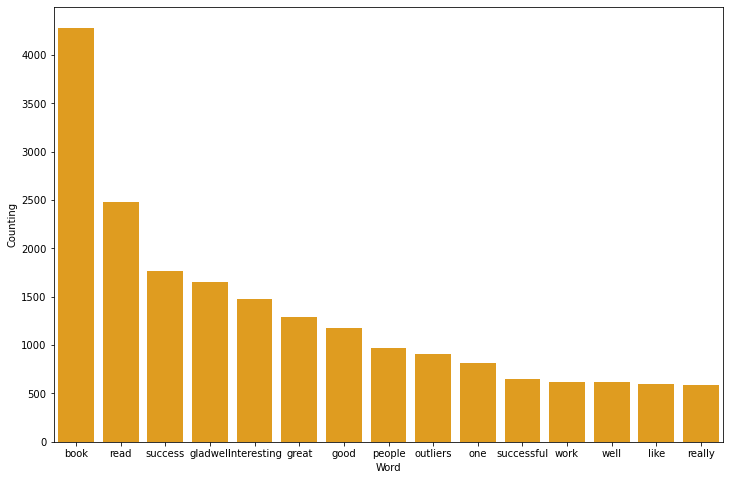

In [155]:
plot_high_frequence_words(df_concat, 'processing3', 15)

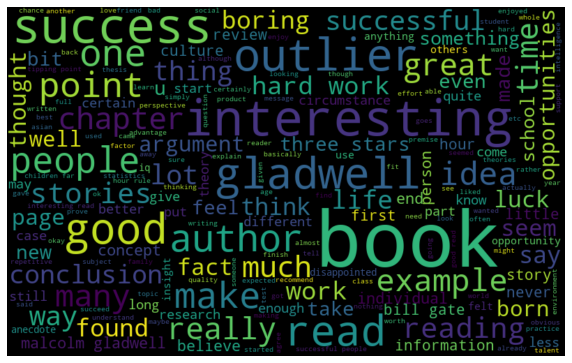

In [156]:
generate_wordcloud_sentiment(df_concat, 'processing3', 0)

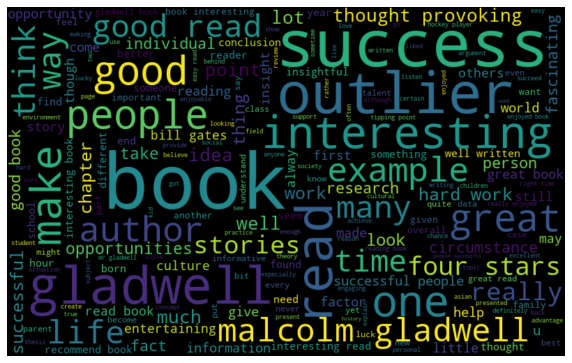

In [157]:
generate_wordcloud_sentiment(df_concat, 'processing3', 1)

### Processing 4: Stemmer

In [158]:
stemmer = nltk.PorterStemmer()

In [159]:
from string import punctuation

punctuation_ = list()
for ponto in punctuation:
    punctuation_.append(ponto)

punctuation__stopwords = punctuation_ + irrelevant_words

processed_review_remove_puncts = list()
for opiniao in df_concat['processing3']:
    new_review_without_puncts = list()
    words_text = token_punctuation.tokenize(opiniao)
    for word in words_text:
        if word not in punctuation__stopwords:
            new_review_without_puncts.append(stemmer.stem(word))
    processed_review_remove_puncts.append(' '.join(new_review_without_puncts))

df_concat['processing4'] = processed_review_remove_puncts


<!-- ### Accuracy after Processing 4 stemming: 0.9337240757439135  -->

In [160]:
classify_text(df_concat, 'processing4', 'y')

0.74822695035461

In [161]:
df_concat['processing4'].head(5)

0                             four star thought provok
1    expect although stori interest lead believ int...
2    outlier gladwel good tour outer end normal rea...
3    surprisingli good ..... .. interest connect on...
4                       success good book read success
Name: processing4, dtype: object

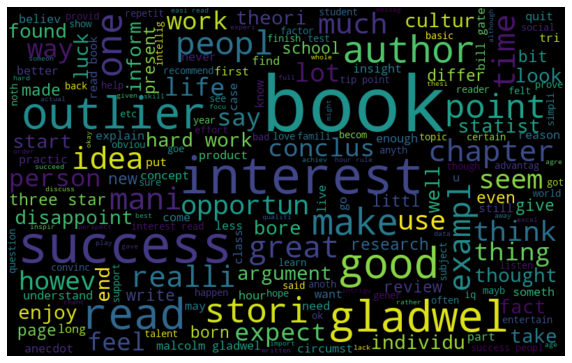

In [162]:
generate_wordcloud_sentiment(df_concat, 'processing4', 0)

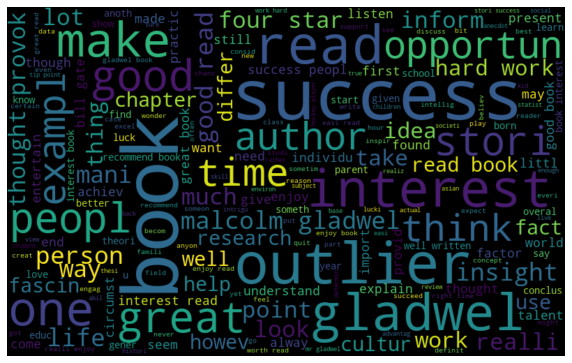

In [163]:
generate_wordcloud_sentiment(df_concat, 'processing4', 1)

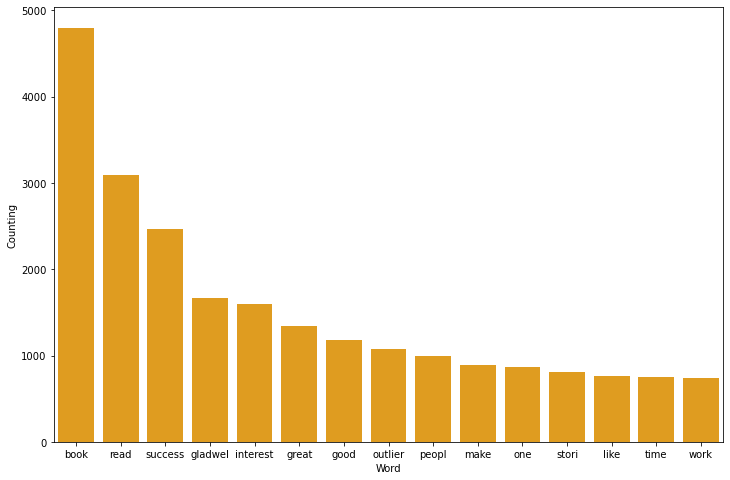

In [164]:
plot_high_frequence_words(df_concat, 'processing4', 15)

### Processing 5: Lemmatizer

In [165]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()

In [166]:
from string import punctuation

punctuation_ = list()
for ponto in punctuation:
    punctuation_.append(ponto)

punctuation__stopwords = punctuation_ + irrelevant_words

processed_review_remove_puncts = list()
for opiniao in df_concat['processing3']:
    new_review_without_puncts = list()
    words_text = token_punctuation.tokenize(opiniao)
    for word in words_text:
        if word not in punctuation__stopwords:
            new_review_without_puncts.append(lemmatizer.lemmatize(word))
    processed_review_remove_puncts.append(' '.join(new_review_without_puncts))

df_concat['processing5'] = processed_review_remove_puncts


### Accuracy after Processing 5 lemmatizer: 0.9661857529305681 

In [167]:
classify_text(df_concat, 'processing5', 'y')

0.7437943262411347

In [168]:
df_concat['processing5'].head(5)

0                          four star thought provoking
1    expected although story interesting lead belie...
2    outlier gladwell good tour outer end normality...
3    surprisingly good ..... .. interesting connect...
4                       success good book read success
Name: processing5, dtype: object

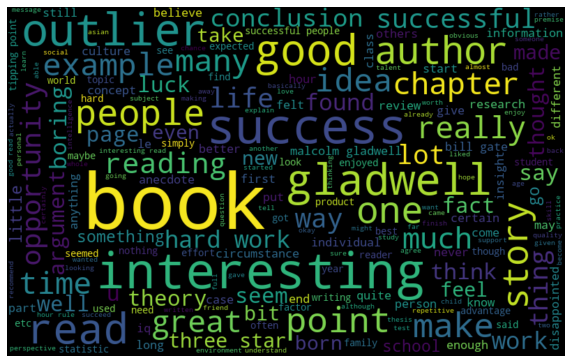

In [169]:
generate_wordcloud_sentiment(df_concat, 'processing5', 0)

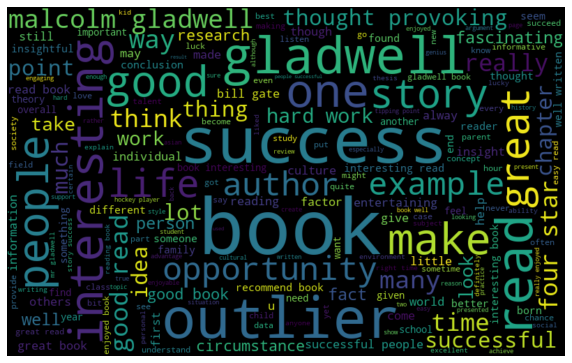

In [170]:
generate_wordcloud_sentiment(df_concat, 'processing5', 1)

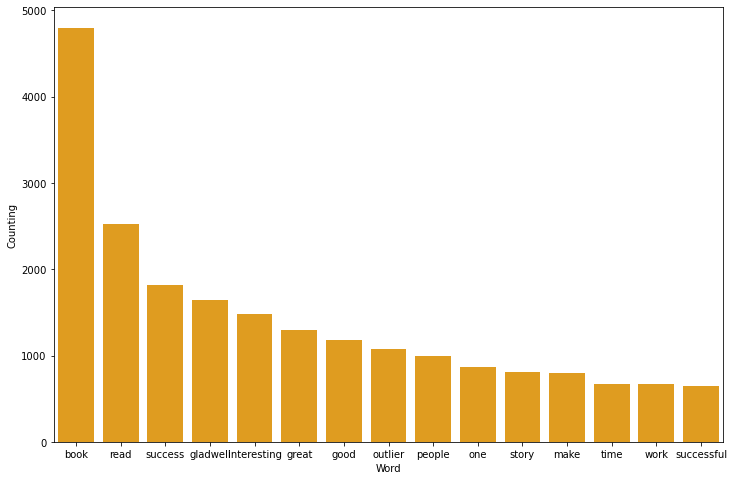

In [171]:
plot_high_frequence_words(df_concat, 'processing5', 15)

In [172]:
df_concat.head(5)

,x,y,processing1,processing2,processing3,processing4,processing5
0,Four Stars. thought provoking,1,Four Stars. thought provoking,Four Stars thought provoking,four stars thought provoking,four star thought provok,four star thought provoking
1,Not What I Expected. Although a few of the sto...,0,Not What I Expected. Although stories interest...,Not What I Expected Although stories interesti...,expected although stories interesting lead bel...,expect although stori interest lead believ int...,expected although story interesting lead belie...
2,Outliers - Gladwell - A Good Tour of the Outer...,1,Outliers - Gladwell - A Good Tour Outer End No...,Outliers Gladwell A Good Tour Outer End Normal...,outliers gladwell good tour outer end normalit...,outlier gladwel good tour outer end normal rea...,outlier gladwell good tour outer end normality...
3,Surprisingly good..... .. Interesting connecti...,1,Surprisingly good..... .. Interesting connecti...,Surprisingly good ..... .. Interesting connect...,surprisingly good ..... .. interesting connect...,surprisingli good ..... .. interest connect on...,surprisingly good ..... .. interesting connect...
4,Success. Good book to read for success,2,Success. Good book read success,Success Good book read success,success good book read success,success good book read success,success good book read success
